# generate random 2d distributions
#### 1) define building blocks (e.g. lognormal and/or normal dist.) --> get N points distributed randomly in density inside known shapes
#### 2) define how to combine them --> build new shapes
#### 3) define how to distort the shapes 

In [14]:
import numpy as np
from numpy.random import rand,lognormal,normal

##1

In [73]:
"parameters"
Ngadi = 200
Nlodi = 200
Nptot = 50000

Wegadi  = rand(Ngadi)
Welodi  = rand(Nlodi)
Wegadi = np.round(Wegadi/Wegadi.sum(),2)
Welodi = np.round(Welodi/Welodi.sum(),2)
Megadi = rand(Ngadi,2) * 0.5 + 0.25
Melodi = rand(Nlodi,2) * 0.5 + 0.25
Vagadi = rand(Ngadi,2) * 0.10
Valodi = rand(Nlodi,2) * 0.10

In [74]:
"building blocks distributions"
bbga_list = []
bblo_list = []

for i in range(Ngadi):
    xco = normal(Megadi[i,0],Vagadi[i,0], int(Nptot * Wegadi[i]))
    yco = normal(Megadi[i,1],Vagadi[i,1], int(Nptot * Wegadi[i]))
    bbga_list.append(np.vstack([xco,yco]))
    
for i in range(Nlodi):
    xco = lognormal(Melodi[i,0],Valodi[i,0], int(Nptot * Welodi[i]))
    yco = lognormal(Melodi[i,1],Valodi[i,1], int(Nptot * Welodi[i]))
    bblo_list.append(np.vstack([xco,yco]))



In [75]:
"stack all together for a first visualisation"
ga_dist = bbga_list[0]
for i in range(1,Ngadi):
    ga_dist = np.hstack((ga_dist,bbga_list[i]))

lo_dist = bbga_list[0]
for i in range(1,Nlodi):
    lo_dist = np.hstack((lo_dist,bblo_list[i]))

lo_dist[0] = lo_dist[0]/lo_dist[0].max()
lo_dist[1] = lo_dist[1]/lo_dist[1].max()

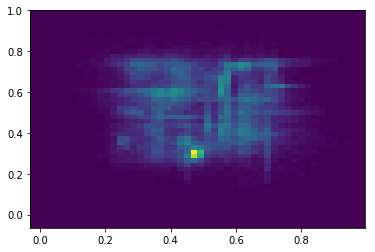

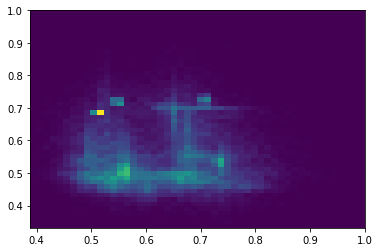

In [76]:
import matplotlib.pyplot as plt

plt.figure(0)
hga,xga,yga,imga = plt.hist2d(ga_dist[0],ga_dist[1],50)

plt.figure(1)
hlo,xlo,ylo,imlo = plt.hist2d(lo_dist[0],lo_dist[1],50)

In [46]:
rand(10)*0.5 + 0.25

array([0.30789396, 0.51395006, 0.67801701, 0.5283413 , 0.26102293,
       0.67108492, 0.29062898, 0.35706809, 0.31606468, 0.38967636])